# Home Baked

In [2]:
import scipy
import numpy as np
ln = scipy.stats.lognorm(0.1, loc=-10)
xs = np.linspace(-100, 100, 100)
plt.plot(xs, ln.pdf(xs))

AttributeError: module 'scipy' has no attribute 'stats'

In [407]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
%autoreload 2
from BO import *
import seaborn as sns

sns.set_style("darkgrid")

In [95]:
def f(x):
    return np.sinc(x * 10)

def noisy_f(x):
    # x: (n, xd) -> (n, yd)
    return f(x) + np.random.randn(*x.shape) * 0.0

In [6]:
# Testing GBUCB eval size
# x: (n,d)=(2,1)
# thetas: (3,3)
# y : (2,1)
bounds = np.array([[0,1]])
X = np.arange(bounds[:, 0], bounds[:, 1], 0.01).reshape(-1, 1)
Y = noisy_f(X)
kernel = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=1.)
m = GPy.models.GPRegression(X,Y,kernel)
GBUCB().eval(np.array([[1],[2]]), t=0, m=m, thetas=[[1,1,1], [2,2,2], [2,2,2]])

array([ 2.38713427,  2.94542378])

In [5]:
input_bounds = np.array([[0,1]])
kernel = GPy.kern.RBF(input_dim=1, variance=1, lengthscale=1.)
acq = GBUCB(beta=lambda t: 10)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s02  0007   9.240538e+02   7.069465e+05 
    00s05  0015   1.703010e+00   4.343052e-02 
    00s08  0024   1.626223e+00   1.075302e-05 
    00s11  0033   1.625973e+00   2.511771e-07 
    00s13  0038   1.625837e+00   7.995609e-11 
Runtime:     00s13
Optimization status: Converged



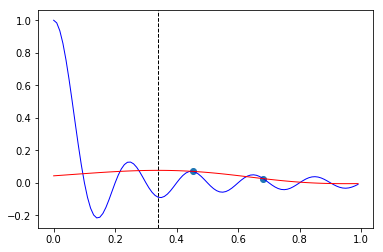

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s02  0008   5.772137e+00   2.467645e+01 
    00s04  0015   1.260159e+00   1.327786e-03 
    00s07  0024   1.264974e+00   4.521724e-05 
    00s09  0029   1.266151e+00   1.632031e-06 
    00s10  0033   1.266181e+00   5.536008e-11 
    00s10  0034   1.266181e+00   5.536008e-11 
Runtime:     00s10
Optimization status: Converged



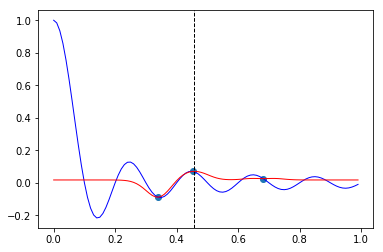

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0004   8.980521e+05   1.030838e+06 
    00s03  0011   8.557032e-01   9.399499e-01 
    00s07  0024  -2.596000e+00   1.528566e-02 
    00s08  0029  -2.641595e+00   3.986237e-06 
    00s10  0035  -2.643182e+00   6.758614e-06 
    00s12  0040  -2.642082e+00   3.489438e-08 
    00s14  0045  -2.642040e+00   2.405909e-09 
Runtime:     00s14
Optimization status: Converged



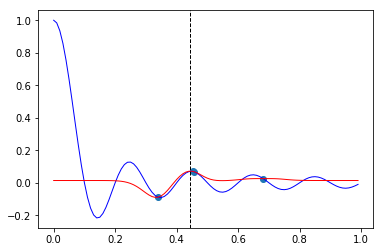

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s01  0004   6.438737e+01   4.175291e+03 
    00s04  0014  -5.558189e+00   5.603980e+01 
    00s06  0019  -7.727781e+00   1.765791e-01 
    00s08  0026  -7.871083e+00   7.515412e-03 
    00s09  0031  -7.862527e+00   2.284547e-05 
    00s11  0035  -7.862629e+00   1.562477e-06 
    00s14  0042  -7.862730e+00   1.971565e-07 
Runtime:     00s14
Optimization status: Converged



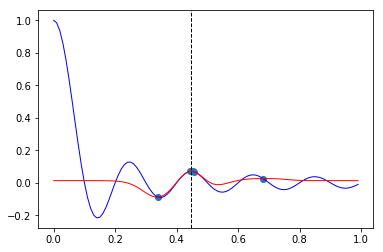

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0001   1.918851e+01   1.371797e+00 
    00s02  0008  -7.243215e-01   3.008709e+00 
    00s07  0023  -1.578531e+01   2.116037e-01 
    00s08  0026  -1.582927e+01   2.167100e-03 
    00s08  0028  -1.582911e+01   3.048407e-03 
    00s10  0034  -1.583457e+01   3.640571e-06 
    00s11  0035  -1.583510e+01   2.582278e-05 
    00s12  0038  -1.583544e+01   2.524934e-05 
    00s13  0043  -1.583499e+01   1.022747e-12 
Runtime:     00s13
Optimization status: Converged



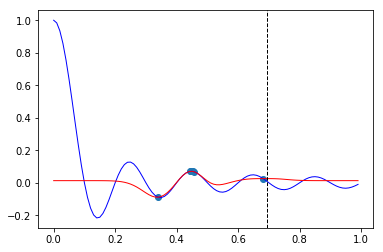

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0002   1.484933e+01   2.624609e+00 
    00s02  0009   1.282598e+03   5.889124e+06 
    00s05  0016  -1.201955e+01   1.508160e+01 
    00s07  0022  -1.843396e+01   6.055035e-02 
    00s10  0030  -1.845508e+01   2.166603e-04 
    00s13  0039  -1.845691e+01   3.663871e-06 
    00s16  0048  -1.845689e+01   1.352695e-08 
Runtime:     00s16
Optimization status: Converged



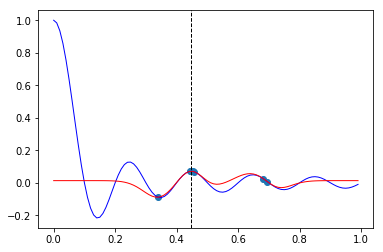

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0002   1.091935e+01   7.397599e+00 
    00s02  0008  -2.497858e+01   2.889716e+01 
    00s04  0016  -2.655432e+01   3.501344e-03 
    00s06  0021  -2.655477e+01   7.698155e-05 
    00s09  0028  -2.655457e+01   1.715478e-07 
    00s10  0033  -2.655456e+01   3.362074e-13 
Runtime:     00s10
Optimization status: Converged



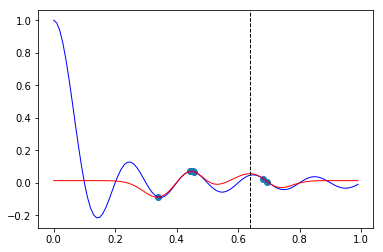

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0002   2.156798e+01   2.137922e+00 
    00s03  0010   1.117967e+06   4.635135e+05 
    00s05  0019   1.621370e+05   4.580947e+10 
    00s07  0023  -1.640746e+01   3.734116e+02 
    00s09  0030  -2.903298e+01   4.193930e-01 
    00s12  0038  -2.911881e+01   1.140903e-04 
    00s14  0046  -2.911947e+01   2.006736e-06 
    00s15  0050  -2.911945e+01   7.095166e-09 
    00s16  0054  -2.911945e+01   1.381705e-07 
Runtime:     00s16
Optimization status: Converged



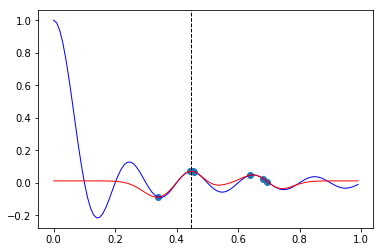

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0003   3.865858e+00   1.593936e+01 
    00s03  0011  -3.645700e+01   2.981593e+00 
    00s08  0027  -3.727266e+01   1.005550e-05 
    00s11  0036  -3.727248e+01   1.626195e-07 
Runtime:     00s11
Optimization status: Converged



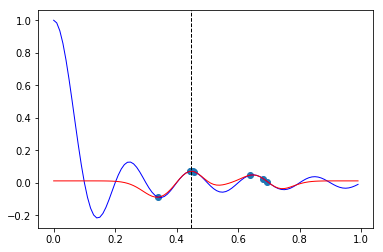

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0002   2.215132e+01   4.369044e+00 
    00s03  0010  -3.782365e+01   1.271320e+01 
    00s09  0030  -4.545502e+01   5.239336e-04 
    00s11  0034  -4.545564e+01   1.179821e-07 
    00s11  0036  -4.545562e+01   1.580782e-08 
    00s12  0039  -4.545563e+01   1.094387e-05 
Runtime:     00s12
Optimization status: Converged



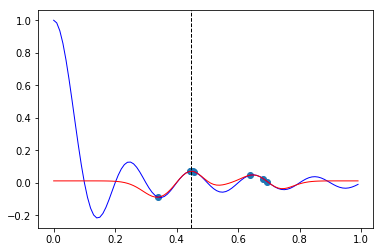

array([0.44769765])

In [139]:
bo = BO(noisy_f, kernel, acq, input_bounds, hyperparam_point_estimate=True)
bo.run(true_func=f)

reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.lengthscale
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.rbf.variance
reconstraining parameters GP_regression.Gaussian_noise.variance


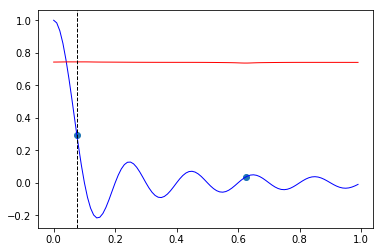

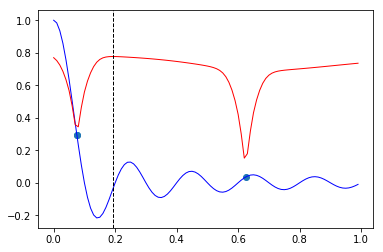

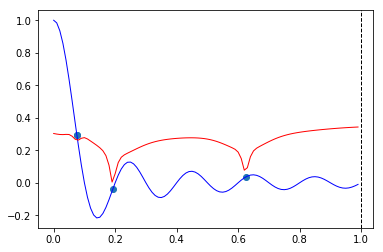

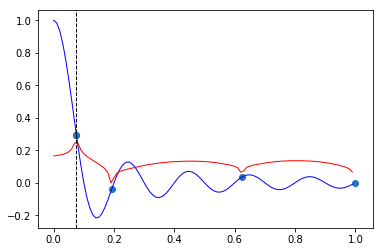

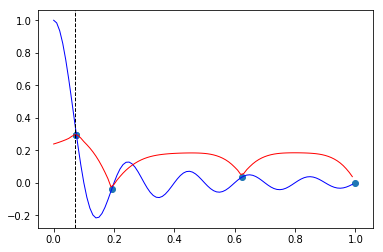

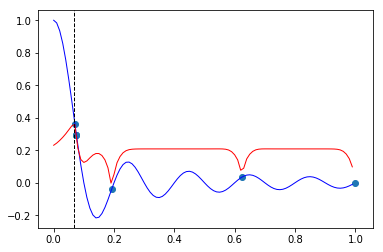

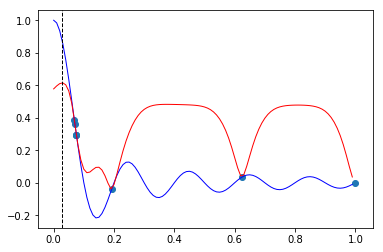

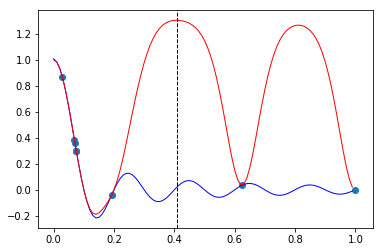

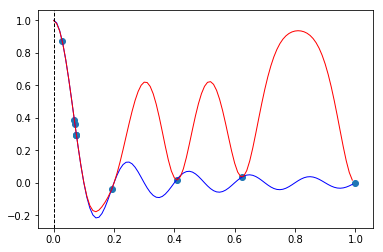

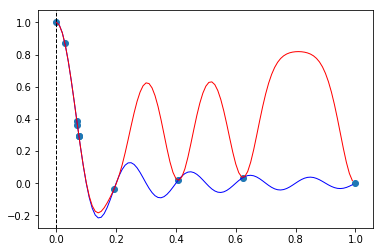

array([0.])

In [141]:
bo = BO(noisy_f, kernel, acq, input_bounds, hyperparam_point_estimate=False)
bo.run(true_func=f)

 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


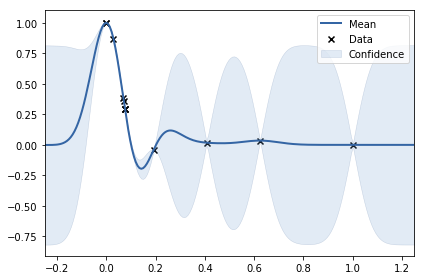

In [142]:
bo.m.optimize()
bo.m.plot()

# DNGO

In [358]:
# Keras network

import numpy as np
from keras import regularizers
from keras import optimizers
from keras.models import Model
from keras.layers import Input, Dense, Dropout

############ Data #############
def f(x):
    # return np.sin(x * 10) * 100 + 100
    return np.sinc(x) * 10

def noisy_f(x):
    # x: (n, xd) -> (n, yd)
    return f(x) + np.random.randn(*x.shape) * 0.2

bounds = np.array([[0,10]])
X = np.random.uniform(bounds[:, 0], bounds[:, 1], 100).reshape(-1, 1)
Y = noisy_f(X)

########### Network ############

dim_input = 1
dim_output = 1
dim_basis = 50

kernel_regularizer = None # regularizers.l2(0.01)
x = Input(shape=(dim_input,))
y = Dense(50, activation="relu", 
              kernel_regularizer=kernel_regularizer)(x)
# y = Dropout(0.5)(y)
y = Dense(50, activation="relu",
              kernel_regularizer=kernel_regularizer)(y)
# y = Dropout(0.5)(y)
basis = Dense(dim_basis, activation="tanh",
                         kernel_regularizer=kernel_regularizer)(y)

pred_y = Dense(dim_output, activation='linear')(basis)
nn_basis = Model(inputs=x, outputs=basis)
nn = Model(inputs=x, outputs=pred_y)

# opt = optimizers.SGD(lr=0.5, momentum=0.001, decay=0.0, nesterov=False)
nn.compile(optimizer='adam', loss='mean_squared_error')

In [352]:
history = nn.fit(X, Y, epochs=10000, verbose=0, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["loss", "val_loss"])
plt.show() 

# Line
Xp = np.linspace(bounds[:, 0], bounds[:, 1], 1000).reshape(-1,1)
Yp = nn.predict_on_batch(Xp)

plt.scatter(X,Y)
plt.plot(Xp, Yp)
plt.plot(Xp, f(Xp), dashes=[2, 2], color='black')

KeyboardInterrupt: 

In [346]:
# Replace output layer with bayesian linear regressor

kernel = GPy.kern.Linear(dim_basis) + GPy.kern.Bias(1)
features = nn_basis.predict_on_batch(X)
m = GPy.models.GPRegression(features,Y,kernel)
m.randomize()
m.optimize()
m

GP_regression.,value,constraints,priors
sum.linear.variances,0.372517564508,+ve,
sum.bias.variance,7.61644453044,+ve,
Gaussian_noise.variance,0.0231637423681,+ve,


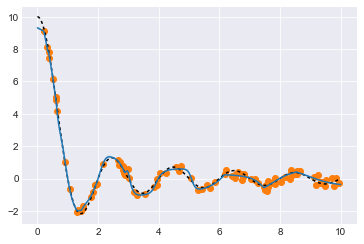

In [347]:
# Plot confidence

Xp = np.linspace(bounds[:, 0], bounds[:, 1], 1000).reshape(-1,1)
Yt = f(Xp)
Dp = nn_basis.predict_on_batch(Xp)
mean, var = m.predict(Dp)
plt.fill_between(Xp.reshape(-1), (mean + var * 2).reshape(-1), (mean - var * 2).reshape(-1), alpha=.1)
plt.scatter(X, Y)
plt.plot(Xp, Yt, dashes=[2, 2], color='black')
plt.plot(Xp, mean)

 /Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


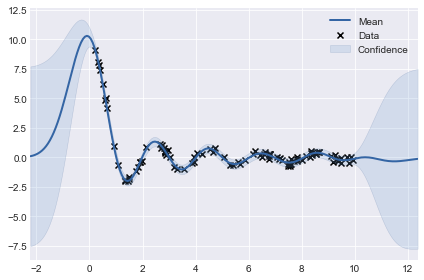

In [348]:
# Compare with regular GP

kernel = GPy.kern.RBF(1) + GPy.kern.Bias(1)
m = GPy.models.GPRegression(X,Y,kernel)
m.randomize()
m.optimize()
m.plot()

# DNGO in BO

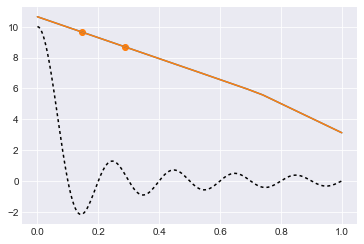

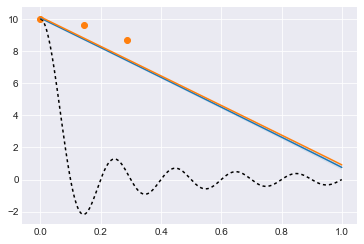

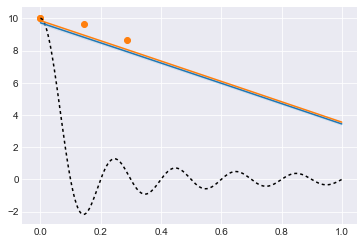

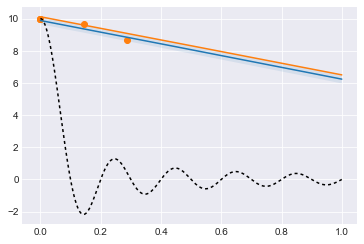

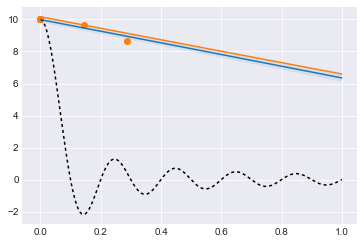

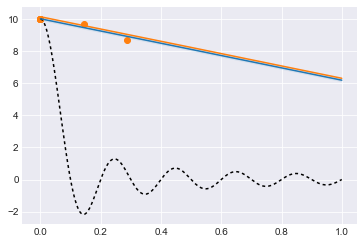

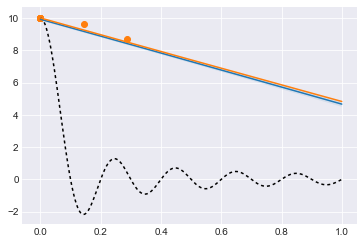

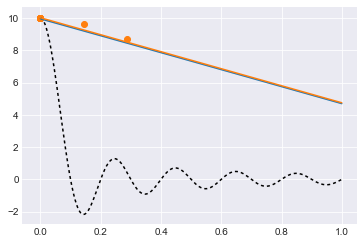

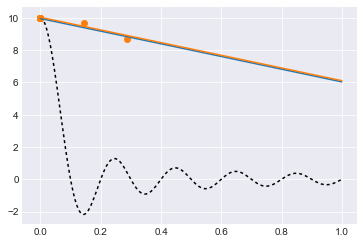

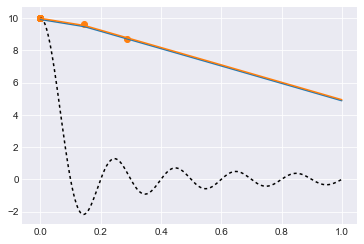

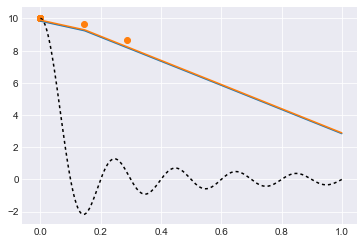

In [338]:
n_iter = 10
bounds = np.array([[0.00001,1]])

def random_grid_samples(n_samples):
    dims = bounds.shape[0]
    return np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_samples, dims))

def plot_prediction():
    X_line = np.arange(np.array([0]), np.array([1]), 0.001).reshape(-1,1)
    Y_line = f(Xp)
    D_line = nn_basis.predict_on_batch(X_line)
    mean, var = m.predict(D_line)
    plt.fill_between(X_line.reshape(-1), (mean + var * 2).reshape(-1), (mean - var * 2).reshape(-1), alpha=.1)
    plt.scatter(X, Y)
    plt.plot(X_line, Y_line, dashes=[2, 2], color='black')
    plt.plot(X_line, mean)
    plt.plot(X_line, acq(X_line))
    plt.show()

# Data
X = random_grid_samples(2)
Y = f(X)

# NN
nn = model
nn_basis = basis_model
history = nn.fit(X, Y, epochs=500, validation_split=0.1, verbose=0)
D = nn_basis.predict_on_batch(X)

# GP
kernel = GPy.kern.Linear(dim_basis, ARD=True)
m = GPy.models.GPRegression(D,Y,kernel)
m.randomize()
m.optimize()
    
def acq(x):
    beta = 2
    features = nn_basis.predict_on_batch(x)
    mean, var = m.predict(features)
    return mean + beta * var

def max_acq(n_starts=100):
    min_y = float("inf")
    min_x = None

    def min_obj(x):
        """lift into array and negate.
        """
        x = np.array([x])
        return -acq(x)[0]

    # TODO: turn into numpy operations to parallelize
    for x0 in random_grid_samples(n_starts):
        res = minimize(min_obj, x0=x0, bounds=bounds, method='L-BFGS-B')        
        if res.fun < min_y:
            min_y = res.fun
            min_x = res.x 

    return min_x

plot_prediction()

for i in range(0, n_iter):
    # new datapoint from acq
    x_new = max_acq()

    # Update data
    X = np.concatenate([X, np.array([x_new])])
    Y = np.concatenate([Y, np.array([f(x_new)])])
    
    # Fit NN
    history = nn.fit(X, Y, epochs=500, validation_split=0.1, verbose=0)
    feature_new = nn_basis.predict(x_new)
    D = np.concatenate([D, feature_new])
    
    # Fit BLR
    m.set_XY(D, Y)
    m.randomize() # TODO: or use previous?
    m.optimize()

    # Plot
    plot_prediction()


# TF BO

In [379]:
# Minimal tf implementation for sine.

import tensorflow as tf
import numpy as np

class TFModel(object):
    def __init__(self):
        with tf.name_scope('placeholders'):
            self.x = tf.placeholder('float', [None, 1])
            self.y_true = tf.placeholder('float', [None, 1])

        with tf.name_scope('neural_network'):
            l = tf.contrib.layers.fully_connected(self.x, 50, activation_fn=tf.nn.relu)
            l = tf.contrib.layers.fully_connected(l, 50, activation_fn=tf.nn.relu)
            self.basis = tf.contrib.layers.fully_connected(l, 50, activation_fn=tf.nn.tanh)
            self.y_pred = tf.contrib.layers.fully_connected(self.basis, 1, activation_fn=None)
            self.loss = tf.nn.l2_loss(self.y_pred - self.y_true)

        with tf.name_scope('optimizer'):
            self.train_op = tf.train.AdamOptimizer().minimize(self.loss)

    def fit(self, sess, x, y, batch_size=None):
        # with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(10000):
            _, train_loss = sess.run([self.train_op, self.loss],
                                      feed_dict={self.x: x[:, batch_size],
                                                 self.y_true: y[:, batch_size]})
    def predict(self, sess, x):
        return sess.run(self.y_pred, {self.x: x[:, None]})


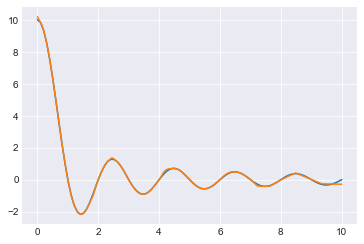

In [380]:
tfmodel = TFModel()

# Train
sess = tf.Session()
x_train = (np.random.rand(100) * 10)
y_train = (np.sinc(x_train) * 10)

tfmodel.fit(sess, x_train, y_train, batch_size=None)

# Predict
Xp = np.linspace(0, 10, 1000)
plt.plot(x, np.sinc(x) * 10) #+ 100)
Yp = tfmodel.predict(sess, Xp)
plt.plot(Xp, Yp)

In [493]:
%load_ext autoreload
%autoreload 2
from models import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [477]:
def sin(x):
    return np.sin(x)

def sinc(x):
    return np.sinc(x) * 10

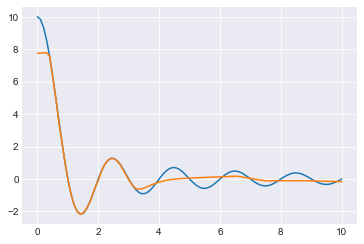

In [478]:
# Test TF

tfmodel = TFModel(epochs=1000)

# Train
sess = tf.Session()
x_train = (np.random.rand(100) * 10)[:,None]
y_train = sinc(x_train)

tfmodel.fit(sess, x_train, y_train)

# Predict
Xp = (np.linspace(0, 10, 100))[:,None]
plt.plot(Xp, sinc(Xp))
Yp = tfmodel.predict(sess, Xp)
plt.plot(Xp, Yp)


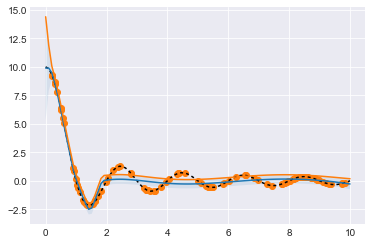

In [479]:
# Test DNGO

x_train = (np.random.rand(100) * 10)[:,None]
y_train = sinc(x_train)

nn = TFModel(dim_basis=50, epochs=100)
model = BOModel(nn)
model.init(x_train, y_train)

x = (np.linspace(0, 10, 100))[:,None]
y = np.sinc(x) * 10

model.plot_prediction(x, y)

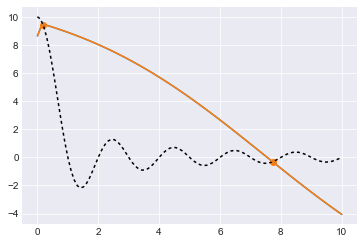

KeyboardInterrupt: 

In [482]:
nn = TFModel(dim_basis=50, epochs=10000)
model = BOModel(nn)
bo = BO(sinc, model, n_iter=2, bounds=np.array([[0,10]]))
bo.run()

In [563]:
x_train = (np.random.uniform(-4, 4, 20))[:,None]
y_train = sinc(x_train)

In [527]:
x_train = np.array([[-2.73432902],
       [-2.2231372 ],
       [ 1.64348061],
       [-1.63041937],
       [ 0.80449328],
       [-1.19611581],
       [-3.14492907],
       [-3.37190328],
       [ 0.54750908],
       [-1.20681635],
       [-3.39709425],
       [ 1.32234051],
       [ 3.10709469],
       [-3.90744985],
       [ 0.39828163],
       [ 0.61682835],
       [ 0.93453627],
       [ 2.87001646],
       [ 0.58044735],
       [-0.47716071]])
y_train = sinc(x_train)

In [846]:
x_train = np.array([[ 0.37454012],
       [ 0.95071431],
       [ 0.73199394],
       [ 0.59865848],
       [ 0.15601864],
       [ 0.15599452],
       [ 0.05808361],
       [ 0.86617615],
       [ 0.60111501],
       [ 0.70807258],
       [ 0.02058449],
       [ 0.96990985],
       [ 0.83244264],
       [ 0.21233911],
       [ 0.18182497],
       [ 0.18340451],
       [ 0.30424224],
       [ 0.52475643],
       [ 0.43194502],
       [ 0.29122914]])

def f(x):
    return np.sinc(x * 10 - 5).sum(axis=1)[:, None]

y_train = f(x_train)

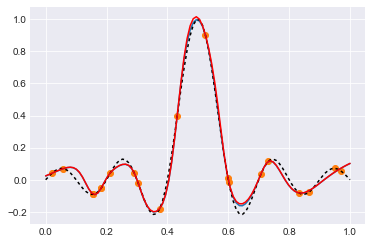

In [878]:
# Why confident even though it does not pass through points??

nn = TFModel(dim_basis=50, epochs=2000)
model = BOModel(nn)
model.init(x_train, y_train)

x = (np.linspace(0, 1, 100))[:,None]
y = f(x)
# x = (np.linspace(-6, 6, 100))[:,None]
# y = np.sinc(x) * 10
model.plot_prediction(x,y)

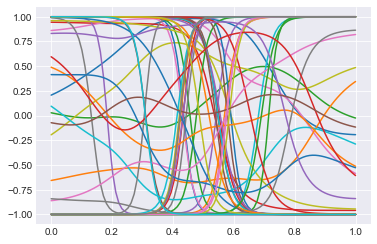

In [879]:
# Plot basis functions

D = model.nn_model.predict_basis(model.sess, x)
for i in range(model.nn_model.dim_basis):
    plt.plot(x, D[:, i])

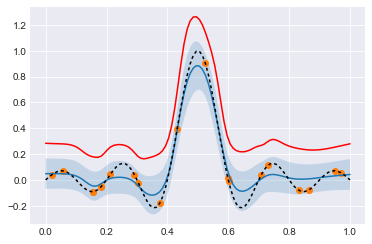

In [880]:
# Test GP (with pretrained nn)

model.init(x_train, y_train, train_nn=False)

x = (np.linspace(0, 1, 100))[:,None]
y = f(x)
# x = (np.linspace(-6, 6, 100))[:,None]
# y = np.sinc(x) * 10
kernel = GPy.kern.Linear(model.nn_model.dim_basis, variances=0.008)
model.D = model.nn_model.predict_basis(model.sess, model.X)
model.gp = GPy.models.GPRegression(model.D, model.nn_model.y, kernel)
model._current_thetas = [[0.7889519, 0.9]]
# model._current_thetas = [model.gp.param_array]
# model.optimize_hyperparams()
model.plot_prediction(x,y)

In [881]:
from models import *
reg = BayesianLinearRegression(1.5, 30)
reg.fit(model.D, model.Y, do_optimize=False)
mean, var = reg.predict(model.nn_model.predict_basis(model.sess, X_line))

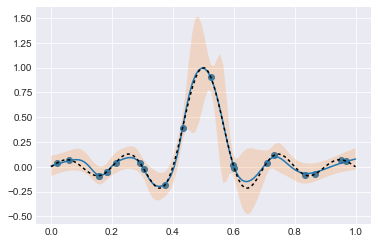

In [882]:
X_line = x
Y_line = y

plt.plot(X_line, mean)
plt.scatter(model.X, model.Y)
plt.plot(X_line, Y_line, dashes=[2, 2], color='black')
plt.fill_between(X_line.reshape(-1), (mean + var * 2).reshape(-1), (mean - var * 2).reshape(-1), alpha=.2)

Optimization terminated successfully.
         Current function value: 5.747364
         Iterations: 70
         Function evaluations: 159
1.48400648157 142.832300513


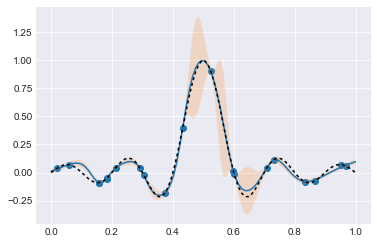

In [884]:
reg = BayesianLinearRegression()
reg.fit(model.D, model.Y, do_optimize=True)
mean, var = reg.predict(model.nn_model.predict_basis(model.sess, X_line))

X_line = x
Y_line = y

plt.plot(X_line, mean)
plt.scatter(model.X, model.Y)
plt.plot(X_line, Y_line, dashes=[2, 2], color='black')
plt.fill_between(X_line.reshape(-1), (mean + var * 2).reshape(-1), (mean - var * 2).reshape(-1), alpha=.2)
print(reg.alpha, reg.beta)

In [845]:
nn = TFModel(dim_basis=50, epochs=100)
model = BOModel(nn, n_approx_marg=50)
model.init(x_train, y_train)

x = (np.linspace(0, 1, 100))[:,None]
y = f(x)
model.plot_prediction(x,y)

KeyboardInterrupt: 

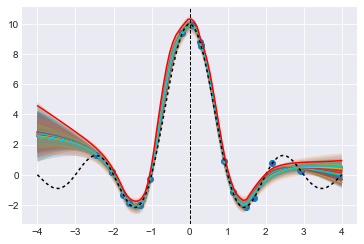

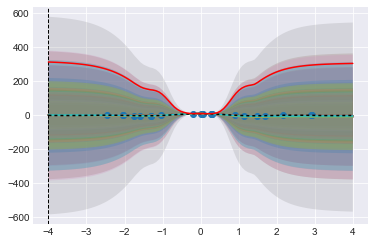

KeyboardInterrupt: 

In [544]:
nn = TFModel(dim_basis=50, epochs=1000)
model = BOModel(nn, n_approx_marg=50)
bo = BO(sinc, model, n_iter=10, bounds=np.array([[-4,4]]))
bo.run(n_kickstart=20)

# Spearmint

In [106]:
# !cd spearmint && mongod --fork --logpath ./log/mongodb.log --dbpath /usr/local/var/mongodb
# !cd spearmint && source activate spearmint && python ../../Spearmint/spearmint/main.py .

In [107]:
# !cd spearmint && source activate spearmint && python spearmint_plots.py .